In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from matplotlib.ticker import MaxNLocator

### Functions 

In [2]:
def Sens_curves(option_opsins):
    
    if option_opsins==0:
        ##### Raw opsin responses
        N_points = 25
        raw = np.loadtxt("Data/Opsins_raw.txt")
        idx = np.array(np.linspace(0,raw[0,:].size-1, N_points),dtype=int)
        return raw[-1,idx], raw[0,idx], raw[1,idx], raw[2,idx], raw[3,idx]
        
    if option_opsins==1:
        ##### Fitted opsin responses HC-blocked
        N_points = 25
        fit = np.loadtxt("Data/Opsins_fit.txt")
        idx = np.array(np.linspace(0,fit[0,:].size-1, N_points),dtype=int)
        return fit[-1,idx], fit[0,idx], fit[1,idx], fit[2,idx], fit[3,idx]
    
    if option_opsins==2:
        ##### Functional opsin curves
        Red_ops = np.loadtxt("Data/Functional_trace_OpsinR.txt")
        Green_ops = np.loadtxt("Data/Functional_trace_OpsinG.txt")
        Blue_ops = np.loadtxt("Data/Functional_trace_OpsinB.txt")
        UV_ops = np.loadtxt("Data/Functional_trace_OpsinU.txt")
        l_array = np.loadtxt("Data/Functional_trace_Opsin_wavelength.txt")
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
        
        Red_mean = np.mean(np.reshape(Red_ops[1,:], (int(Red_ops[1,:].size/13), 13)), axis=0)
        Green_mean = np.mean(np.reshape(Green_ops[1,:], (int(Green_ops[1,:].size/13), 13)), axis=0)
        Blue_mean = np.mean(np.reshape(Blue_ops[1,:], (int(Blue_ops[1,:].size/13), 13)), axis=0)
        UV_mean = np.mean(np.reshape(UV_ops[1,:], (int(UV_ops[1,:].size/13), 13)), axis=0)
    
        return np.flip(l_array), (Red_mean), (Green_mean), (Blue_mean), (UV_mean)
    

In [3]:
def shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b):
    
    l_array, red, green, blue, _ = Sens_curves(1)
    
    #---- side_ ->  0:Left, 1:Right, 2:nothing
    if side_r == 0: 
        red = np.append(red, np.full(shift_red+1, red[-1]))
        red = np.roll(red, -shift_red-1)[:-shift_red-1]  
    if side_r == 1:
        red = np.append(np.full(shift_red+1,red[0]),red)
        red = np.roll(red, shift_red+1)[shift_red+1:]
    if side_g == 0:
        green = np.append(green, np.full(shift_green+1,green[-1]))
        green = np.roll(green, -shift_green-1)[:-shift_green-1]
    if side_g == 1:
        green = np.append(np.full(shift_green+1,green[-1]), green)
        green = np.roll(green, shift_green+1)[shift_green+1:]    
    if side_b == 0:
        blue = np.append(blue, np.full(shift_blue+1,blue[-1]))
        blue = np.roll(blue, -shift_blue-1)[:-shift_blue-1]
    if side_b == 1:
        blue = np.append(np.full(shift_blue+1,blue[0]),blue)
        blue = np.roll(blue, shift_blue+1)[shift_blue+1:]
        
    return l_array, red, green, blue

Max_difference 25.42372881355925
Max_difference 12.203389830508456


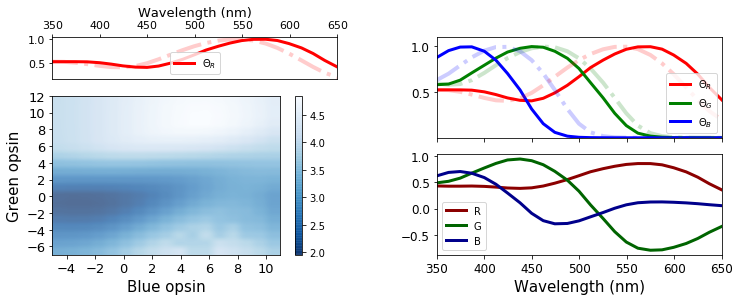

In [9]:
# We shift the opsin curves using the function shift_sens, then, we minimize the cost function using the file CouplingParams_Dichro_Trichro
# Data from cluster
shift_red = 1
side_r = np.array([1])
mixed = 0
Cost_fun = np.loadtxt("Data/Cluster/Cost_fun_shift_red_"+str(shift_red)+"_side_r_"+str(side_r)+"_mixed_"+str(mixed)+".txt")[:,:-5]

fig = plt.figure(figsize=(12, 4))
grid = plt.GridSpec(4, 2, hspace = 0.4, wspace = 0.35)
p1 = fig.add_subplot(grid[0,0])
p2 = fig.add_subplot(grid[1:,0])
p3 = fig.add_subplot(grid[:2, 1])
p4 = fig.add_subplot(grid[2:, 1])

fig_p2 = p2.imshow(np.flip(Cost_fun, axis=0), extent = [-5, 11, -7, 12], aspect='auto', cmap = 'Blues_r', alpha=0.7, interpolation='hanning')
idx = np.where(Cost_fun == np.min(Cost_fun))[0]
p2.set_xlabel("Blue opsin", fontsize=15)
p2.set_ylabel("Green opsin", fontsize=15)
p2.xaxis.set_major_locator(MaxNLocator(integer=True))
p2.yaxis.set_major_locator(MaxNLocator(integer=True))
p2.tick_params(labelsize=13)
plt.colorbar(fig_p2, ax=p2)

#----------- Optimal parameters from the cost function matrix
shift_green=0 
side_g = 0
shift_blue=2
side_b = 0
shift_red=1
side_r = 1

l_array, red, green, blue = shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b)
p1.plot(l_array, red, color='r', linewidth=3, label = r'$\Theta_{R}$')

p3.plot(l_array, red, color='r', linewidth=3, label = r'$\Theta_{R}$')
p3.plot(l_array, green, color='g', linewidth=3, label = r'$\Theta_{G}$')
p3.plot(l_array, blue, color='b', linewidth=3, label = r'$\Theta_{B}$')

# #----------- Optimal parameters from the cost function matrix
Max_shifted = l_array[np.argmax(red)]
# print("l_max_red_shifted" ,Max_shifted)
Max_shifted_ = l_array[np.argmax(green)]
# print("l_max_green_shifted" ,Max_shifted_)

shift_green=0
side_g = 2
shift_blue=2
side_b = 2
shift_red=1
side_r = 2

l_array, red, green, blue = shift_sens(shift_red, shift_blue, shift_green, side_r, side_g, side_b)
p1.plot(l_array, red, color='r', linestyle='-.', linewidth=4, alpha=0.2)

p3.plot(l_array, red, color='r', linestyle='-.', linewidth=4, alpha=0.2)
p3.plot(l_array, green, color='g', linestyle='-.', linewidth=4, alpha=0.2)
p3.plot(l_array, blue, color='b', linestyle='-.', linewidth=4, alpha=0.2)

#----------- Optimal parameters from the cost function matrix
Max_true = l_array[np.argmax(red)]
# print("l_max_red" ,Max_true)
Max_true_ = l_array[np.argmax(green)]
# print("l_max_green" ,Max_true_)
print("Max_difference", np.abs(Max_shifted-Max_true))
print("Max_difference", np.abs(Max_shifted_-Max_true_))

p1.tick_params(labelsize=11)
p1.xaxis.tick_top()
p1.set_xlabel("Wavelength (nm)", fontsize=13)
p1.xaxis.set_label_position('top') 
p1.set_xlim(350, 650)
p1.legend(fontsize=10)

p3.tick_params(labelsize=12)
p3.set_xticklabels([])
p3.set_ylim(0.001, 1.1)
p3.set_xlim(350, 650)
p3.legend(fontsize=10)

Opt_h1 = np.loadtxt("Data/Cluster/Optimal_h1.txt")
Opt_h2 = np.loadtxt("Data/Cluster/Optimal_h2.txt")
Opt_h3 = np.loadtxt("Data/Cluster/Optimal_h3.txt")
L_array = np.loadtxt("Data/Cluster/Optimal_l_array.txt")

for i in range(1):
    p4.plot(L_array, Opt_h1[i,:], color='darkred', linewidth=3, label='R')
    p4.plot(L_array, Opt_h2[i,:], color='darkgreen', linewidth=3, label='G')
    p4.plot(L_array, Opt_h3[i,:], color='darkblue', linewidth=3, label='B')
    
p4.tick_params(labelsize=12)
p4.set_xlabel("Wavelength (nm)", fontsize=15)
p4.set_xlim(350, 650)
p4.legend(fontsize=10)
# plt.savefig("Plots/Fig_Optimal_opsins.pdf")